[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sys\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       968
           1       0.88      0.96      0.92       147

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



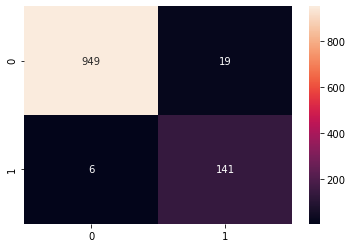

In [5]:
#Spam Ham

import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
df_spam = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                           names=["label", "message"])
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re
#Clean the date
le = WordNetLemmatizer()
list_words = []
for i in range(len(df_spam)):
    res = re.sub('[^a-zA-Z]', ' ', df_spam['message'][i])
    res = res.lower()
    res = res.split()
    res = [le.lemmatize(word) for word in res if word not in set(stopwords.words('english'))]
    res = ' '.join(res)
    list_words.append(res)
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()
x_cv = cv.fit_transform(list_words).toarray()
x_tf = tf.fit_transform(list_words).toarray()
y = pd.get_dummies(df_spam['label'])
y=y.iloc[:,1].values

#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_cv,y,test_size=0.2,random_state=1)

#Training model
from sklearn.naive_bayes import MultinomialNB
mu = MultinomialNB()
naive_model = mu.fit(x_train,y_train)
y_pred = naive_model.predict(x_test)

#Confusion matrix, accuracy scores

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d');

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       968
           1       0.99      0.82      0.90       147

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



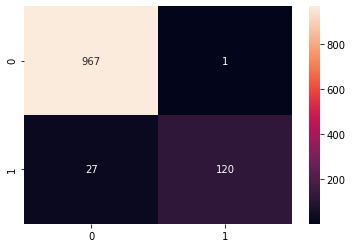

In [6]:
#Train test split with TF-IDF method
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_tf,y,test_size=0.2,random_state=1)

#Training model
from sklearn.naive_bayes import MultinomialNB
mu = MultinomialNB()
naive_model = mu.fit(x_train,y_train)
y_pred = naive_model.predict(x_test)

#Confusion matrix, accuracy scores

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d');